In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import numpy as np

**learning about regresion**: Part 1
- Creating a model
- Compilling a model
- fitting a model
- evaluating a model

In [94]:
X = tf.range(-100, 100, 4, dtype=tf.float32)
y = tf.range(-90, 110, 4, dtype=tf.float32)
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

X_train, y_train, X_test, y_test

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [95]:
tf.random.set_seed(42)

model = Sequential([
    layers.Input(1),
    layers.Dense(10),
    layers.Dense(1, name='Output'),
], name='model_01')
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=Adam(learning_rate=0.01),
    metrics=['mse']
)


In [96]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100


2/2 [==============================] - 1s 10ms/step - loss: 51.4496 - mse: 3628.4265
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 44.8382 - mse: 2752.3926
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 38.5528 - mse: 2018.9156
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 32.1815 - mse: 1400.4679
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 26.0499 - mse: 917.9159
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 19.9977 - mse: 540.3895
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 14.2289 - mse: 270.4530
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 8.7698 - mse: 119.8824
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 8.6886 - mse: 83.9573
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.9991 - mse: 125.7141
Epoch 11/100
2/2 [==============================] - 0s

In [97]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 306ms/step


array([[ 68.414734],
       [ 72.3249  ],
       [ 76.23506 ],
       [ 80.14523 ],
       [ 84.05539 ],
       [ 87.96555 ],
       [ 91.87572 ],
       [ 95.78589 ],
       [ 99.69605 ],
       [103.60622 ]], dtype=float32)

In [98]:
model.summary()

Model: "model_01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 Output (Dense)              (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
y_pred = model.predict(X_test)
y_pred, y_test


1/1 [==============================] - 0s 74ms/step


(array([[ 68.414734],
        [ 72.3249  ],
        [ 76.23506 ],
        [ 80.14523 ],
        [ 84.05539 ],
        [ 87.96555 ],
        [ 91.87572 ],
        [ 95.78589 ],
        [ 99.69605 ],
        [103.60622 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>)

In [100]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 336ms/step - loss: 1.9895 - mse: 4.0248


[1.989525556564331, 4.024792671203613]

In [101]:
y_pred = tf.squeeze(y_pred)

In [102]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9895256>

In [103]:
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=4.0247927>

In [104]:
y_pred, tf.squeeze(y_pred), X_test

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 68.414734,  72.3249  ,  76.23506 ,  80.14523 ,  84.05539 ,
         87.96555 ,  91.87572 ,  95.78589 ,  99.69605 , 103.60622 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 68.414734,  72.3249  ,  76.23506 ,  80.14523 ,  84.05539 ,
         87.96555 ,  91.87572 ,  95.78589 ,  99.69605 , 103.60622 ],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([60., 64., 68., 72., 76., 80., 84., 88., 92., 96.], dtype=float32)>)

In [105]:
import matplotlib.pyplot as plt


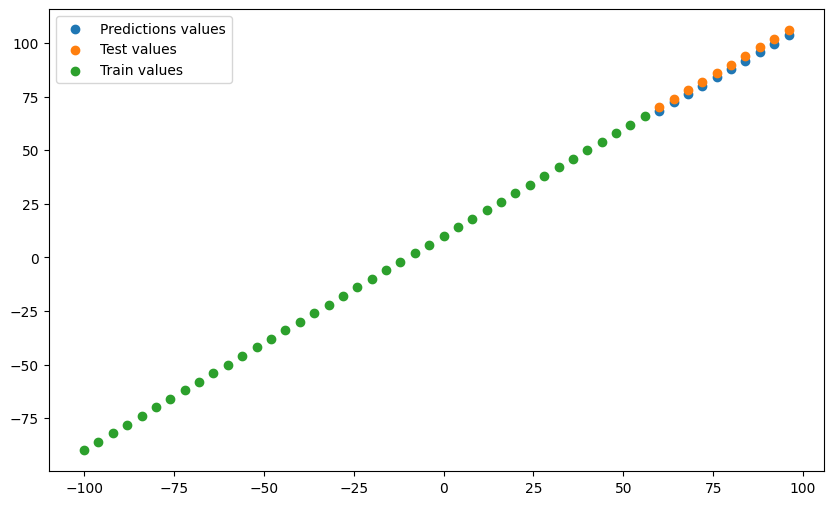

In [106]:
def predictions_graph(X_test=X_test, y_test=y_test, y_pred=y_pred, y_train=y_train, X_train=X_train):
  plt.figure(figsize=(10,6))
  # Scatter plot for predictions
  plt.scatter(X_test, y_pred, label='Predictions values')

  # Scatter plot for real values
  plt.scatter(X_test, y_test, label='Test values')
  plt.scatter(X_train, y_train, label='Train values')
  plt.legend()
  return plt.show()
predictions_graph()